# Как сравнить алгоритмы машинного обучения в Python с помощью scikit-learn

https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

Последнее обновление: 28 августа 2020 г.

Важно последовательно сравнивать производительность нескольких различных алгоритмов машинного обучения.

В этом посте вы узнаете, как создать тестовую систему для сравнения нескольких различных алгоритмов машинного обучения в Python с помощью scikit-learn.

Вы можете использовать этот тестовый набор в качестве шаблона для своих собственных задач машинного обучения и добавлять другие алгоритмы для сравнения.

### Выберите лучшую модель машинного обучения

Как выбрать лучшую модель для решения вашей задачи?

Когда вы работаете над проектом машинного обучения, вам часто приходится выбирать из нескольких хороших моделей. Каждая модель будет иметь разные эксплуатационные характеристики.

Используя методы повторной выборки, такие как перекрестная проверка, вы можете получить оценку того, насколько точной может быть каждая модель на невидимых данных. Вы должны быть в состоянии использовать эти оценки, чтобы выбрать одну или две лучшие модели из набора моделей, которые вы создали.

### Тщательно сравните модели машинного обучения

Когда у вас есть новый набор данных, хорошей идеей будет визуализировать данные с помощью различных методов, чтобы посмотреть на данные с разных точек зрения.

Та же идея применима и к выбору модели. Вы должны использовать несколько различных способов оценки предполагаемой точности ваших алгоритмов машинного обучения, чтобы выбрать один или два для окончательной доработки.

Способ сделать это — использовать различные методы визуализации, чтобы показать среднюю точность, дисперсию и другие свойства распределения точности модели.

В следующем разделе вы узнаете, как именно это можно сделать в Python с помощью scikit-learn.

# Постоянно сравнивайте алгоритмы машинного обучения

Ключом к честному сравнению алгоритмов машинного обучения является обеспечение одинаковой оценки каждого алгоритма на одних и тех же данных.

Этого можно добиться, принудительно оценивая каждый алгоритм в последовательном тестовом наборе.

В приведенном ниже примере сравниваются 6 различных алгоритмов:

    Логистическая регрессия
    Линейный дискриминантный анализ
    K-ближайшие соседи
    Деревья классификации и регрессии
    Наивный Байес
    Опорные векторные машины

Проблема заключается в стандартном наборе данных бинарной классификации, который называется «проблема диабета у индейцев пима». Задача имеет два класса и восемь числовых входных переменных разного масштаба.

Вы можете узнать больше о наборе данных здесь:

    Файл набора данных.
    Детали набора данных

Для оценки каждого алгоритма используется процедура 10-кратной перекрестной проверки, которая, что важно, настроена с одним и тем же случайным начальным числом, чтобы гарантировать, что выполняются одинаковые разбиения обучающих данных и что каждый алгоритм оценивается точно таким же образом.

Каждому алгоритму дается короткое имя, полезное для последующего обобщения результатов.

In [7]:
# Compare Algorithms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import matplotlib.cm as cm
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, LabelEncoder, MinMaxScaler,  LabelBinarizer, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn import model_selection

# алгоритмы ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [8]:
# load dataset
df_train = pd.read_csv('titanic_train.csv')
df_train.head(10)
#X = array[:,0:8]
#Y = array[:,8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
# move target to the right
survived = df_train['Survived']
df_train.drop(labels=['Survived'], axis=1, inplace=True)
df_train['Survived'] = survived
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [89]:
class LabelEncoderPipelineFriendly(LabelEncoder):
    
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        super(LabelEncoderPipelineFriendly, self).fit(X)
        
    def transform(self, X, y=None):
        return super(LabelEncoderPipelineFriendly, self).transform(X).reshape(-1, 1)

    def fit_transform(self, X, y=None):
        return super(LabelEncoderPipelineFriendly, self).fit(X).transform(X).reshape(-1, 1)
    

class FeaturesSum(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X, y=None):
        return np.sum(X, axis=1).reshape(-1, 1)

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)
    

class AgeFeature(BaseEstimator, TransformerMixin):
    # works with df only
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X, y=None):
        # sex, name
        X['Initial'] = 0
        for i in X:
            print(i)
            #X.loc[i,'Initial'] = X.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
            X['Initial'] = X.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
    
        X['Initial'].replace(
            ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
            inplace=True
        )
        X.groupby('Initial')['Age'].mean() # lets check the average age by Initials

        ## Assigning the NaN Values with the Ceil values of the mean ages
        X.loc[(X.Age.isnull()) & (X.Initial=='Mr'), 'Age'] = 33
        X.loc[(X.Age.isnull()) & (X.Initial=='Mrs'), 'Age'] = 36
        X.loc[(X.Age.isnull()) & (X.Initial=='Master'), 'Age'] = 5
        X.loc[(X.Age.isnull()) & (X.Initial=='Miss'), 'Age'] = 22
        X.loc[(X.Age.isnull()) & (X.Initial=='Other'), 'Age'] = 46
        return X['Age'].to_numpy().reshape(-1, 1)

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

In [90]:
def get_sex_col(df):
    return df[['Sex']]

def get_age_name_cols(df):
    return df[['Age', 'Name']]

def get_pclass_col(df):
    return df[['Pclass']]

def get_sum_cols(df):
    return df[['Age', 'Fare']]

def get_num_cols(df):
    return df[['Fare', 'SibSp', 'Parch']]

vec = make_union(*[
    make_pipeline(FunctionTransformer(get_pclass_col, validate=False),  OneHotEncoder(sparse=False)),
    make_pipeline(FunctionTransformer(get_sex_col, validate=False),  LabelEncoderPipelineFriendly()),
    make_pipeline(FunctionTransformer(get_num_cols, validate=False), SimpleImputer(strategy='mean'), MinMaxScaler()),
    make_pipeline(FunctionTransformer(get_age_name_cols, validate=False),  AgeFeature()),
])

In [91]:
vec

FeatureUnion(transformer_list=[('pipeline-1',
                                Pipeline(steps=[('functiontransformer',
                                                 FunctionTransformer(func=<function get_pclass_col at 0x000001F2D0D1F820>)),
                                                ('onehotencoder',
                                                 OneHotEncoder(sparse=False))])),
                               ('pipeline-2',
                                Pipeline(steps=[('functiontransformer',
                                                 FunctionTransformer(func=<function get_sex_col at 0x000001F2CE2433A0>)),
                                                ('labelencoderpipelinef...
                               ('pipeline-3',
                                Pipeline(steps=[('functiontransformer',
                                                 FunctionTransformer(func=<function get_num_cols at 0x000001F2D0B7CDC0>)),
                                                ('simpleimputer',
                                                 SimpleImputer()),
                                                ('minmaxscaler',
                                                 MinMaxScaler())])),
                               ('pipeline-4',
                                Pipeline(steps=[('functiontransformer',
                                                 FunctionTransformer(func=<function get_age_name_cols at 0x000001F2CFDBDF70>)),
                                                ('agefeature',
                                                 AgeFeature())]))])

In [92]:
x_train = vec.fit_transform(df_train)
x_train.shape

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\AppData\Local\Temp\ipykernel_6224\3197960165.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Initial'] = 0
C:\Users\user\AppData\Local\Temp\ipykernel_6224\3197960165.py:38: SettingWithCopyWarning: 
A

Age
Name
Initial


C:\Users\user\AppData\Local\Temp\ipykernel_6224\3197960165.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Initial'] = X.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
C:\Users\user\AppData\Local\Temp\ipykernel_6224\3197960165.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Initial'].replace(


(891, 8)

In [26]:
x_train

array([[ 0.        ,  0.        ,  1.        , ...,  0.125     ,
         0.        , 22.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.125     ,
         0.        , 38.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 26.        ],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.125     ,
         0.33333333, 22.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 26.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 32.        ]])

In [27]:
y_train = df_train['Survived']
y_train.shape

(891,)

In [37]:
X = x_train
Y = y_train

In [38]:
# подготовить конфигурацию для перекрестной проверки 
# тестового комплекта
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

models.append(('ETC', ExtraTreeClassifier()))
models.append(('RFC',RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('BC', BaggingClassifier()))
models.append(('HGBC', HistGradientBoostingClassifier()))


In [39]:
models

[('LR', LogisticRegression(max_iter=1000)),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC()),
 ('ETC', ExtraTreeClassifier()),
 ('GBC', GradientBoostingClassifier()),
 ('ABC', AdaBoostClassifier()),
 ('BC', BaggingClassifier()),
 ('HGBC', HistGradientBoostingClassifier())]

In [40]:
%%time
# оценивайте каждую модель по очереди
results = []
results_list = []
names = []
scoring = 'accuracy'


print('**KFold**')
print('--'*40)
print('name  cv_results.mean  cv_results.std')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    
    
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    results_list.append((name, kfold, cv_results.mean(), cv_results.std()))
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)    
print('=='*40)

print('**StratifiedKFold**')
print('--'*40)
print('name  cv_results.mean  cv_results.std')
for name, model in models:
    
    strkfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)    
    
    cv_results = model_selection.cross_val_score(model, X, Y, cv=strkfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    results_list.append((name, strkfold, cv_results.mean(), cv_results.std()))
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
print('=='*40)

print('**RepeatedKFold**')
print('--'*40)
print('name  cv_results.mean  cv_results.std')
for name, model in models:
    
    repkfold = model_selection.RepeatedKFold(n_splits=10, random_state=seed)
    
    cv_results = model_selection.cross_val_score(model, X, Y, cv=repkfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    results_list.append((name, repkfold, cv_results.mean(), cv_results.std()))
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
print('=='*40)

**KFold**
--------------------------------------------------------------------------------
name  cv_results.mean  cv_results.std
LR: 0.795743 (0.046775)
LDA: 0.790150 (0.051130)
KNN: 0.772147 (0.042739)
CART: 0.802459 (0.040614)
NB: 0.760911 (0.062872)
SVM: 0.634120 (0.068918)
ETC: 0.773283 (0.065104)
GBC: 0.818202 (0.053049)
ABC: 0.812584 (0.053606)
BC: 0.809201 (0.042642)
HGBC: 0.830512 (0.047573)
**StratifiedKFold**
--------------------------------------------------------------------------------
name  cv_results.mean  cv_results.std
LR: 0.794544 (0.037879)
LDA: 0.794544 (0.041988)
KNN: 0.768714 (0.039322)
CART: 0.783333 (0.036158)
NB: 0.753059 (0.034253)
SVM: 0.632984 (0.022671)
ETC: 0.778789 (0.048489)
GBC: 0.832747 (0.029185)
ABC: 0.803508 (0.047151)
BC: 0.815880 (0.026964)
HGBC: 0.832722 (0.022434)
**RepeatedKFold**
--------------------------------------------------------------------------------
name  cv_results.mean  cv_results.std
LR: 0.791929 (0.046679)
LDA: 0.792377 (0.045129

Примечание. Ваши результаты могут отличаться из-за стохастического характера алгоритма или процедуры оценки, а также из-за различий в численной точности. Попробуйте запустить пример несколько раз и сравните средний результат.

Датафрейм ниже предоставляет список имен каждого алгоритма,режима кроссвалидации, средней точности и точности стандартного отклонения.



In [1]:
df_res = pd.DataFrame(results_list, columns = ['model', 'cv', 'cv_results_mean', 'cv_results_std'])
df_res = df_res.sort_values(by='cv_results_mean', ascending=False)

NameError: name 'pd' is not defined

In [97]:
df_res.head(15)

,model,cv,cv_results_mean,cv_results_std
18,GBC,"StratifiedKFold(n_splits=10, random_state=7, s...",0.832747,0.029185
21,HGBC,"StratifiedKFold(n_splits=10, random_state=7, s...",0.832722,0.022434
10,HGBC,"KFold(n_splits=10, random_state=7, shuffle=True)",0.830512,0.047573
29,GBC,"RepeatedKFold(n_repeats=10, n_splits=10, rando...",0.828074,0.042089
32,HGBC,"RepeatedKFold(n_repeats=10, n_splits=10, rando...",0.827065,0.038367
7,GBC,"KFold(n_splits=10, random_state=7, shuffle=True)",0.818202,0.053049
20,BC,"StratifiedKFold(n_splits=10, random_state=7, s...",0.815880,0.026964
8,ABC,"KFold(n_splits=10, random_state=7, shuffle=True)",0.812584,0.053606
31,BC,"RepeatedKFold(n_repeats=10, n_splits=10, rando...",0.809665,0.043328
9,BC,"KFold(n_splits=10, random_state=7, shuffle=True)",0.809201,0.042642


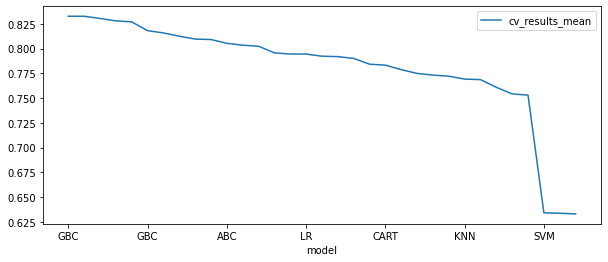

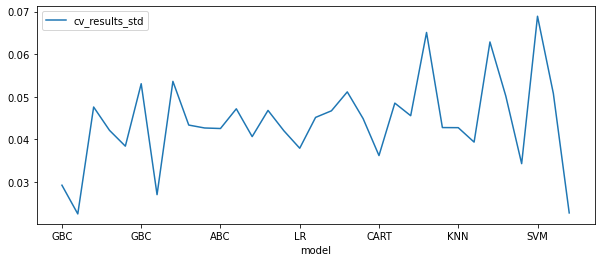

In [98]:
df_res.plot('model', 'cv_results_mean', figsize=(10,4))
df_res.plot('model', 'cv_results_std', figsize=(10,4));

Ниже представлены диаграммы с усами, показывающие разброс оценок точности по каждой перекрестной проверке для каждого алгоритма.

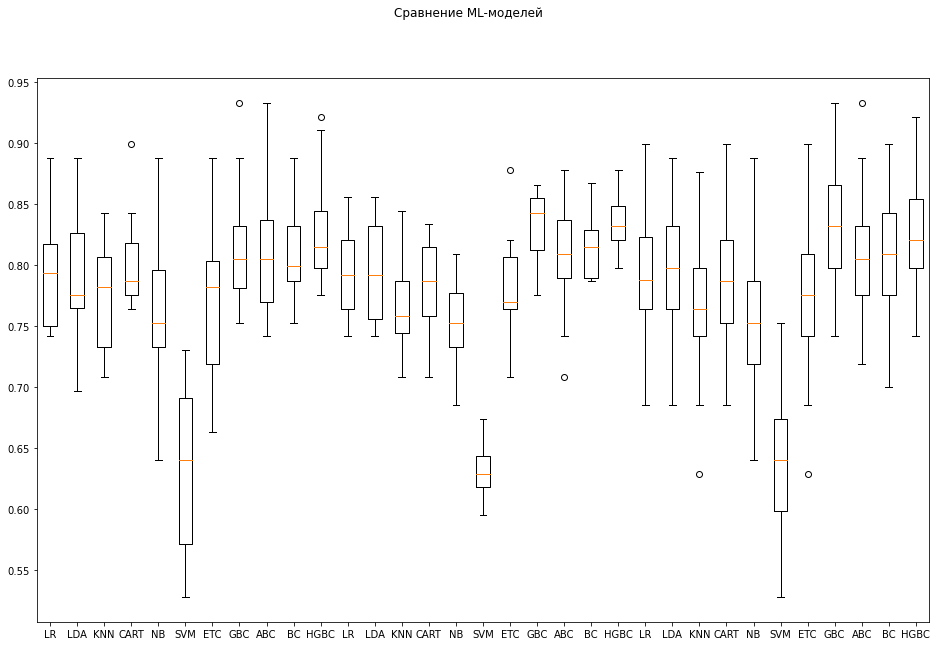

In [80]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(16,10))
fig.suptitle('Сравнение ML-моделей')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Исходя из этих результатов, можно предположить, что как логистическая регрессия, так и линейный дискриминантный анализ, возможно, заслуживают дальнейшего изучения по этой проблеме.

In [95]:
dataframe = pd.DataFrame(([[ 0.        ,  0.        ,  1.        ,   0.125     ,
         0.        , 22.        ],
       [ 1.        ,  0.        ,  0.        ,   0.125     ,
         0.        , 38.        ],
       [ 0.        ,  0.        ,  1.        ,   0.        ,
         0.        , 26.        ],
    
       [ 0.        ,  0.        ,  1.        ,   0.125     ,
         0.33333333, 22.        ],
       [ 1.        ,  0.        ,  0.        ,   0.        ,
         0.        , 26.        ],
       [ 0.        ,  0.        ,  1.        ,   0.        ,
         0.        , 32.        ]]))

In [96]:
dataframe

,0,1,2,3,4,5
0,0.0,0.0,1.0,0.125,0.000000,22.0
1,1.0,0.0,0.0,0.125,0.000000,38.0
2,0.0,0.0,1.0,0.000,0.000000,26.0
3,0.0,0.0,1.0,0.125,0.333333,22.0
4,1.0,0.0,0.0,0.000,0.000000,26.0
5,0.0,0.0,1.0,0.000,0.000000,32.0
